In [1]:
from kneed import DataGenerator, KneeLocator
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os
import scipy.io
import json
import numpy as np
from format_data import *
from utils import *
import pickle

In [12]:
t_pre = 0.2#0.2
t_post = 0.50#0.300
bin_width = 0.005
# Créer les bins de temps"
psth_bins = np.arange(-t_pre, t_post, bin_width)
#gc = np.arange(0, 32)

In [4]:
path = 'Z:/eTheremin/OSCYPEK/OSCYPEK/OSCYPEK_20240710_SESSION_00/'

In [5]:
data = np.load(path+'headstage_0/data_cluster_1_0.005.npy', allow_pickle=True)
features = np.load(path+'headstage_0/features_0.005.npy', allow_pickle=True)
#gc = np.load(path+'headstage_0/good_clusters.npy', allow_pickle=True)
gc = np.arange(0, 4)

In [11]:
features

array([{'Played_frequency': 0.0, 'Condition': 1.0, 'Block': 0.0, 'Frequency_changes': False},
       {'Played_frequency': 0.0, 'Condition': 1.0, 'Block': 0.0, 'Frequency_changes': False},
       {'Played_frequency': 0.0, 'Condition': 1.0, 'Block': 0.0, 'Frequency_changes': False},
       ...,
       {'Played_frequency': 2317.0, 'Condition': 1.0, 'Block': 0.0, 'Frequency_changes': False},
       {'Played_frequency': 2317.0, 'Condition': 1.0, 'Block': 0.0, 'Frequency_changes': False},
       {'Played_frequency': 2317.0, 'Condition': 1.0, 'Block': 0.0, 'Frequency_changes': False}],
      dtype=object)

In [14]:
#tail = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tail')
#tracking = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tracking')
#mc = get_psth(data, features, t_pre, t_post, bin_width, gc, 'mapping change')
playback = get_psth(data, features, t_pre, t_post, bin_width, gc, 'playback') 

pour plot cluster par cluster : 

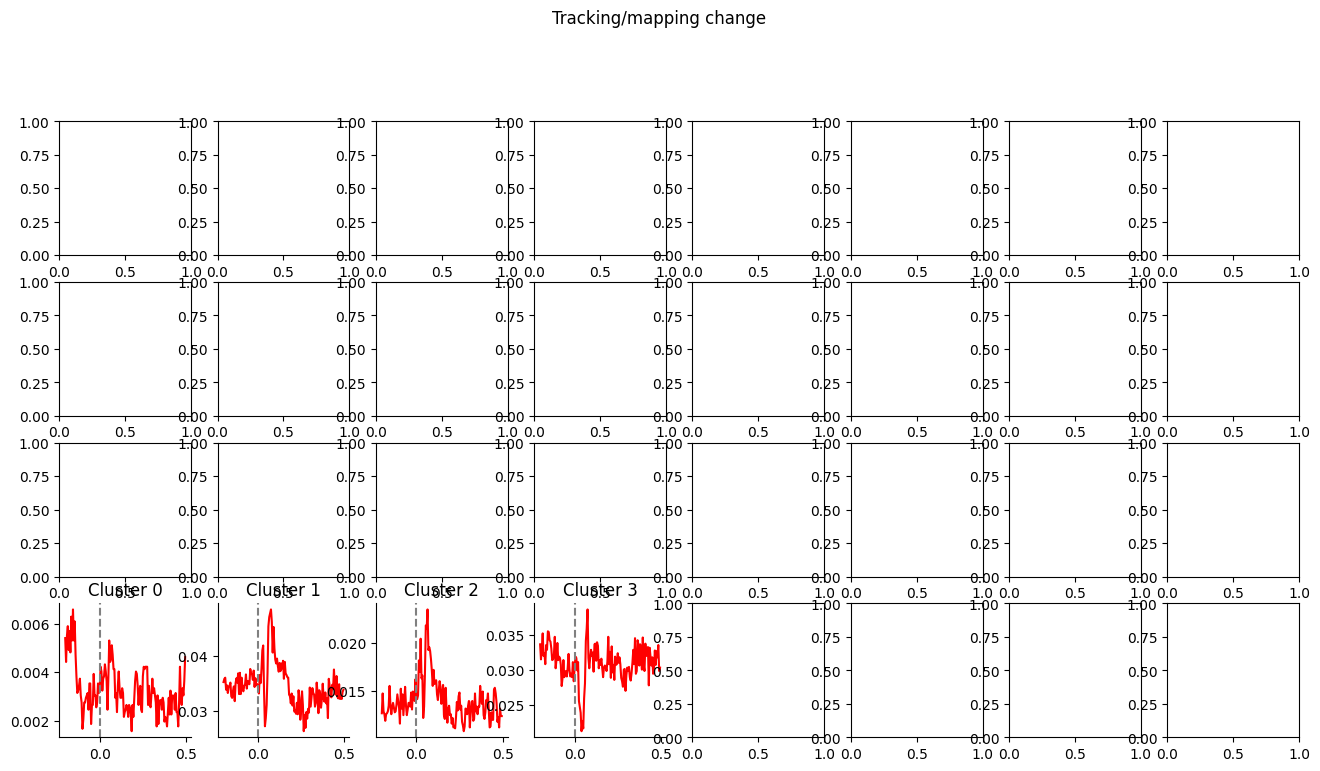

In [15]:
# pour plot cluster par cluster16
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('Tracking/mapping change', y=1.02)
plt.subplots_adjust() 
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)
psth_bins = np.arange(-t_pre, t_post, bin_width)
for cluster in range(num_plots):
    if cluster < num_plots: 
        row, col = get_plot_coords(cluster)
        axes[row, col].plot(psth_bins, np.nanmean(playback[cluster], axis=0), c = 'red', label = 'tracking')
        #axes[row, col].plot(psth_bins, np.nanmean(mc[cluster], axis=0), c = 'purple', label = 'mapping change')
        axes[row, col].axvline(0, c = 'grey', linestyle='--')
        axes[row, col].set_title(f'Cluster {cluster}')
        axes[row, col].spines['top'].set_visible(False)
        axes[row, col].spines['right'].set_visible(False)